In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import numpy as np
from folium import plugins
import datetime
import seaborn as sns

%matplotlib inline

In [2]:
train_data = pd.read_csv('/Users/NICOLAS/Desktop/west_nile/kaggle_competition/assets/train.csv')
spray = pd.read_csv('/Users/NICOLAS/Desktop/west_nile/kaggle_competition/assets/spray.csv')
weather = pd.read_csv('/Users/NICOLAS/Desktop/west_nile/kaggle_competition/assets/weather.csv')

In [3]:
weather.head(2)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6


In [4]:
train_data.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [5]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [6]:
train_groupby = train_data.groupby(['Latitude','Longitude','Species'])[['NumMosquitos']].sum().reset_index()
train_groupby.head(2)

,Latitude,Longitude,Species,NumMosquitos
0,41.644612,-87.604498,CULEX PIPIENS,53
1,41.644612,-87.604498,CULEX PIPIENS/RESTUANS,75


In [7]:
def plot_heat_map(df):
    latitude = df.Latitude.values
    longitude = df.Longitude.values
    numMostquiotes = df.NumMosquitos.values
    
    chicago = folium.Map(location=[np.mean(latitude),np.mean(longitude)])
    data = [(x,y,d) for x,y,d in zip(latitude,longitude,numMostquiotes)]
    chicago.add_children(plugins.HeatMap(data,radius=12))
    return chicago

        

In [65]:
# plot_heat_map(train_groupby)

In [37]:
train_data.head(4)

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Date,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2007-05-29,"North Streeter Drive, Chicago, IL 60611, USA",CULEX PIPIENS/RESTUANS,53,N STREETER DR,T129,"5300 N STREETER DR, Chicago, IL",41.891126,-87.611560,5,1,0
2007-05-29,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,1,0


In [56]:
# train_data.Date.to_datetime()
# train_data.sort_values('Date',ascending=True,inplace=True)
# train_data.set_index('Date',inplace=True)
train_data.index = train_data.index.to_datetime()

# df_goog.index = df_goog.index.to_datetime()  # Convert to datetime

In [59]:
x = train_data.index[0]


2007

In [38]:
# train_data[['NumMosquitos']].plot()

In [44]:
# def get_year(x):
#     date_format = x.split('-')
#     year = int(date_format[0])
#     month = int(date_format[1])
#     day = int(date_format[2])
    
#     date = datetime.date(year,month,day)
#     return date.year


# def get_month(x):
#     date_format = x.split('-')
#     year = int(date_format[0])
#     month = int(date_format[1])
#     day = int(date_format[2])
    
#     date = datetime.date(year,month,day)
#     return date.month
    
    
    

In [61]:
# train_data['year'] = train_data.Date.map(lambda x: get_year(x))
# train_data['month'] = train_data.Date.map(lambda x: get_month(x)
train_data['year'] = train_data.index.map(lambda x: x.year)
train_data['month'] = train_data.index.map(lambda x: x.month)

In [66]:
data = train_data.groupby(['year','month'])[['NumMosquitos','WnvPresent']].sum().reset_index()
time_series = train_data.groupby(train_data.index)[['NumMosquitos','WnvPresent']].sum().reset_index()

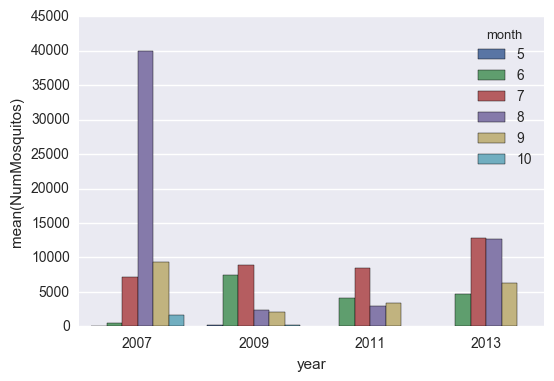

In [63]:
sns.barplot(data.year,data.NumMosquitos,hue=data.month)

In [87]:
# time_series.index = time_series['index']
# time_series[['NumMosquitos']].plot()
time_series.Open.resample('M').plot()
time_series.info()

AttributeError: 'DataFrame' object has no attribute 'Open'

In [73]:
time_series.drop('index',axis=1,inplace=True)

In [76]:
time_series['year'] = time_series.index.map(lambda x: x.year)
time_series['month'] = time_series.index.map(lambda x: x.month)
time_series.head()

,NumMosquitos,WnvPresent,year,month
index,,,,
2007-05-29,40,0,2007,5
2007-06-05,127,0,2007,6
2007-06-26,216,0,2007,6
2007-06-29,85,0,2007,6
2007-07-02,240,0,2007,7


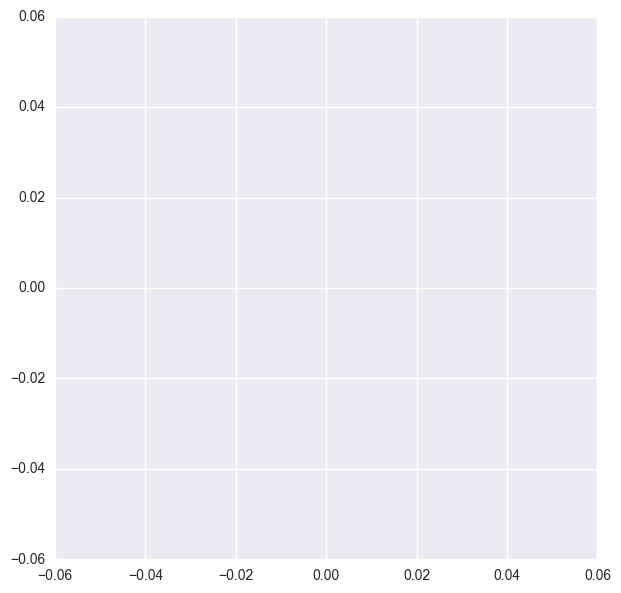

In [79]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
for year in time_series.year.unique():
    subset = time_series[time_series.year == year]
    

In [ ]:
#